In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from datetime import datetime


In [2]:
# Load and preprocess data
df = pd.read_csv('3_benchmark_UK.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df_filtered = df[df['DATE'] >= '1992-09-01']

# Select relevant columns and rename
plot_df = df_filtered[['DATE', 'ONS_raw', 'con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']].copy()


model_labels = {
    "ONS_raw": "ONS Monthly GDP",
    "con_MLP": "MLP",
    "con_LSTM": "LSTM",
    "con_XGB": "XGB",
    "con_ENET": "ENET"
}

# Melt the dataframe
melted_df = plot_df.melt(id_vars='DATE', var_name='Model', value_name='Value')

# Apply readable model labels AFTER melting
melted_df['Model'] = melted_df['Model'].map(model_labels)

# Define colors and line styles
model_colors = {
    "ONS Monthly GDP": "#000000",     # black
    "ENET": "#4D4D4D",                # gray30
    "LSTM": "#7F7F7F",                # gray50
    "MLP": "#999999",                 # gray60
    "XGB": "#B3B3B3"                  # gray70
}

model_linetypes = {
    "ONS Monthly GDP": "solid",
    "ENET": "solid",
    "LSTM": "dashed",
    "MLP": "dotted",
    "XGB": "dashdot"
}

/var/folders/1b/b3lsjhy10fsd753tw_292d5w0000gn/T/ipykernel_16562/2792285280.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


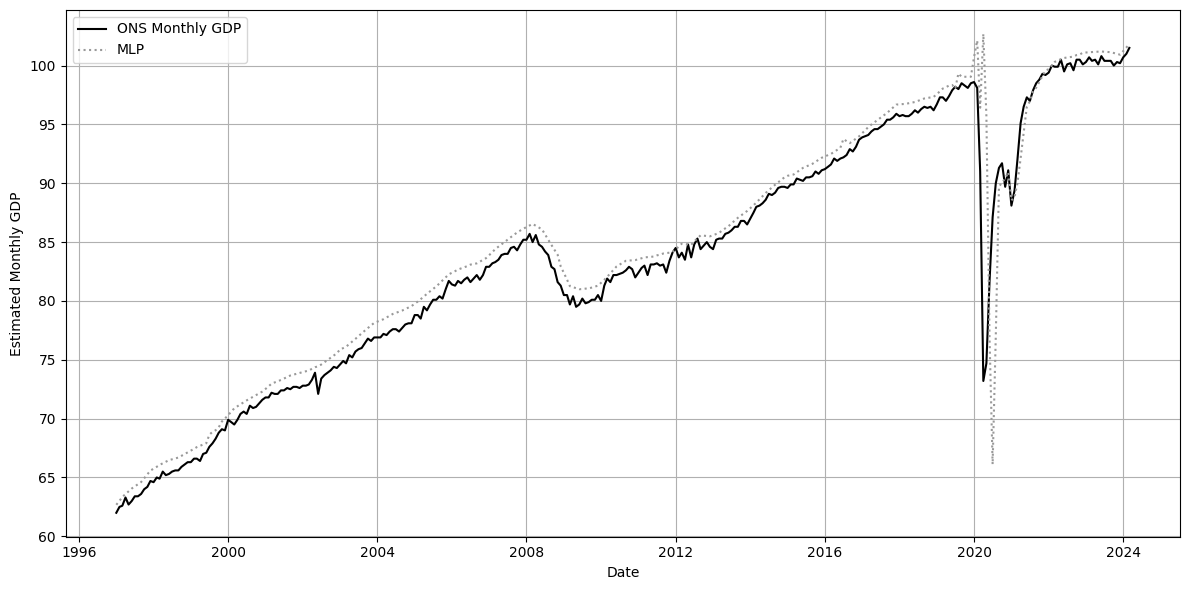

In [3]:
import matplotlib.pyplot as plt

# Filtering
subset_df = melted_df[melted_df['Model'].isin(['ONS Monthly GDP', 'MLP'])].dropna()

# Plot
plt.figure(figsize=(12, 6))

for model in ['ONS Monthly GDP', 'MLP']:
    temp_df = subset_df[subset_df['Model'] == model]
    plt.plot(temp_df['DATE'], temp_df['Value'],
             label=model,
             color=model_colors.get(model, '#888888'),
             linestyle=model_linetypes.get(model, 'solid'))

plt.ylabel("Estimated Monthly GDP")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("UK_benchmark_1.pdf", bbox_inches='tight', dpi = 500)
plt.show()



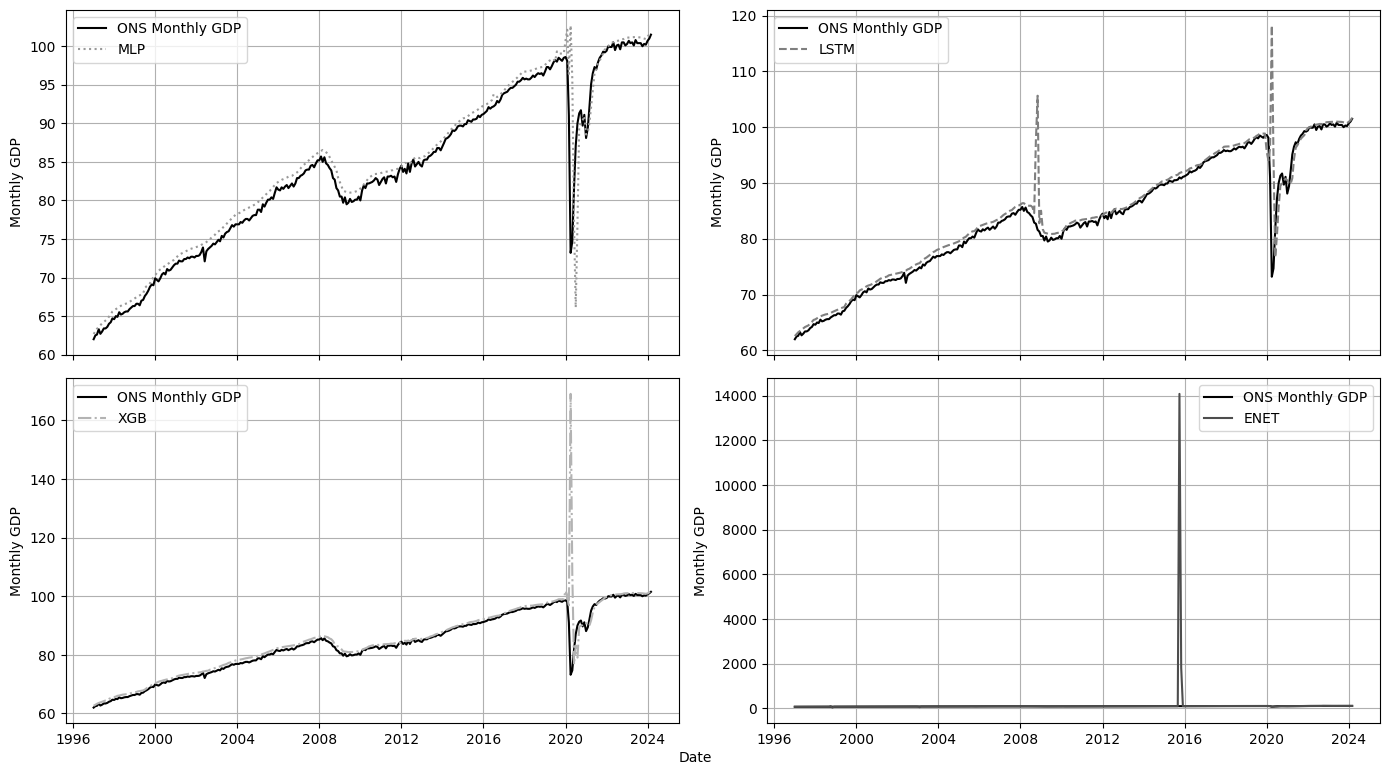

In [4]:
import matplotlib.pyplot as plt

raw_df = df_filtered[['DATE', 'ONS_raw', 'con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']].copy()

model_raw_cols = ['con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']
model_names = {
    "ONS_raw": "ONS Monthly GDP",
    'con_MLP': 'MLP',
    'con_LSTM': 'LSTM',
    'con_XGB': 'XGB',
    'con_ENET': 'ENET'
}

# 2x2 subplot 
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axes = axes.flatten()

for idx, col in enumerate(model_raw_cols):
    ax = axes[idx]

    # Plot ONS
    ax.plot(raw_df['DATE'], raw_df['ONS_raw'],
            label=model_names['ONS_raw'],
            color=model_colors["ONS Monthly GDP"],
            linestyle=model_linetypes["ONS Monthly GDP"])
    
    # Plot model
    ax.plot(raw_df['DATE'], raw_df[col],
            label=model_names[col],
            color=model_colors.get(model_names[col], '#888888'),
            linestyle=model_linetypes.get(model_names[col], 'solid'))

    ax.set_ylabel("Monthly GDP")
    ax.grid(True)
    ax.legend()

# X label
fig.text(0.5, 0.04, 'Date', ha='center')
plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.savefig("UK_benchmark_1_app.pdf", bbox_inches='tight', dpi = 500)
plt.show()

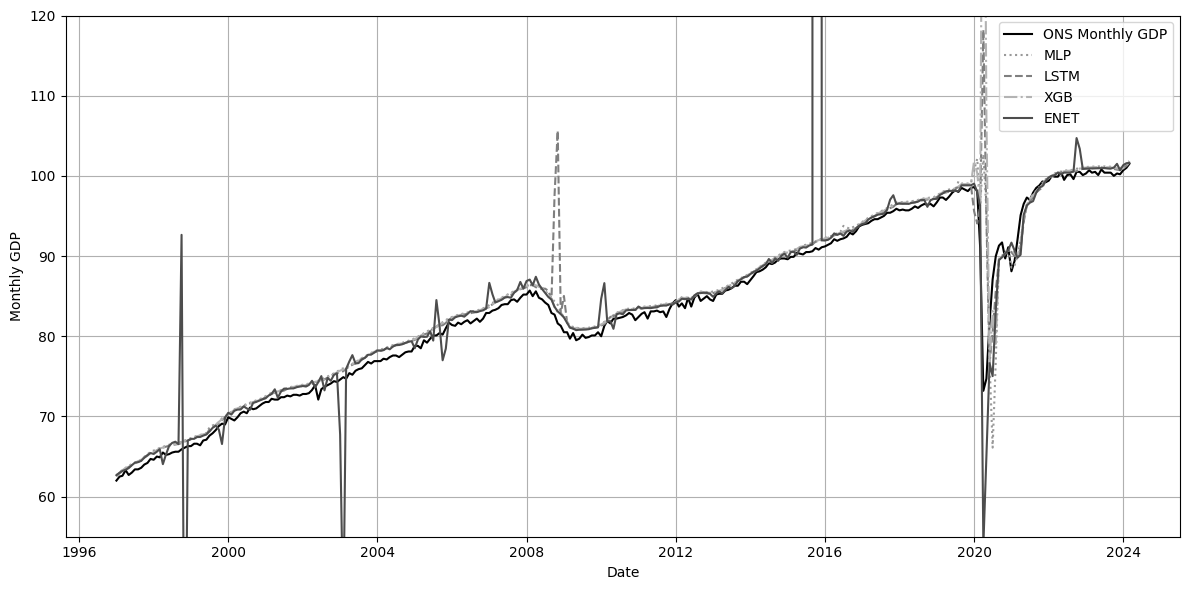

In [5]:
import matplotlib.pyplot as plt

raw_df = df_filtered[['DATE', 'ONS_raw', 'con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']].copy()

model_names = {
    "ONS_raw": "ONS Monthly GDP",
    'con_MLP': 'MLP',
    'con_LSTM': 'LSTM',
    'con_XGB': 'XGB',
    'con_ENET': 'ENET'
}

plt.figure(figsize=(12, 6))

plt.plot(raw_df['DATE'], raw_df['ONS_raw'],
         label=model_names['ONS_raw'],
         color=model_colors["ONS Monthly GDP"],
         linestyle=model_linetypes["ONS Monthly GDP"])

# Plot all models
for col in ['con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']:
    plt.plot(raw_df['DATE'], raw_df[col],
             label=model_names[col],
             color=model_colors.get(model_names[col], '#888888'),
             linestyle=model_linetypes.get(model_names[col], 'solid'))

plt.ylim(55, 120)

plt.ylabel("Monthly GDP")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


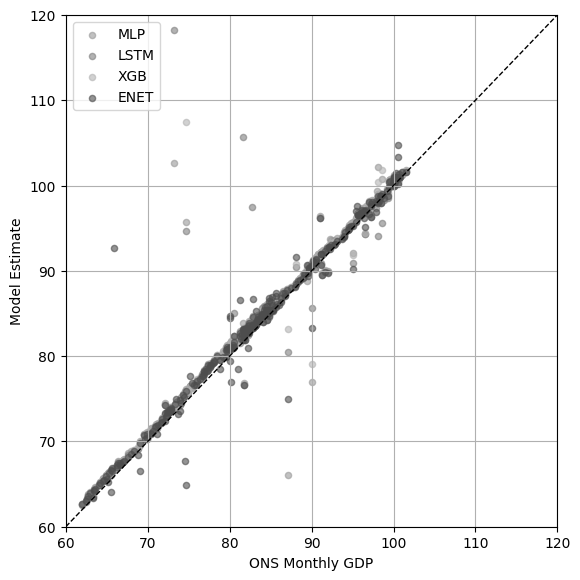

In [6]:
import matplotlib.pyplot as plt

plot_df_raw = df_filtered[['DATE', 'ONS_raw', 'con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']].copy()
plot_df_raw = plot_df_raw.rename(columns={
    "ONS_raw": "ONS Monthly GDP",
    "con_MLP": "MLP",
    "con_LSTM": "LSTM",
    "con_XGB": "XGB",
    "con_ENET": "ENET"
})

models = ['MLP', 'LSTM', 'XGB', 'ENET']

# 15cm × 15cm → 5.90551 inches
plt.figure(figsize=(5.90551, 5.90551))

for model in models:
    valid_df = plot_df_raw[['ONS Monthly GDP', model]].dropna()
    plt.scatter(valid_df['ONS Monthly GDP'], valid_df[model],
                label=model,
                color=model_colors.get(model, '#888888'),
                alpha=0.6, s=20)

min_val = 60
max_val = 120
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.xlabel("ONS Monthly GDP")
plt.ylabel("Model Estimate")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save as 15cm × 15cm
plt.savefig("UK_benchmark_2.pdf", bbox_inches='tight', dpi=500)
plt.show()



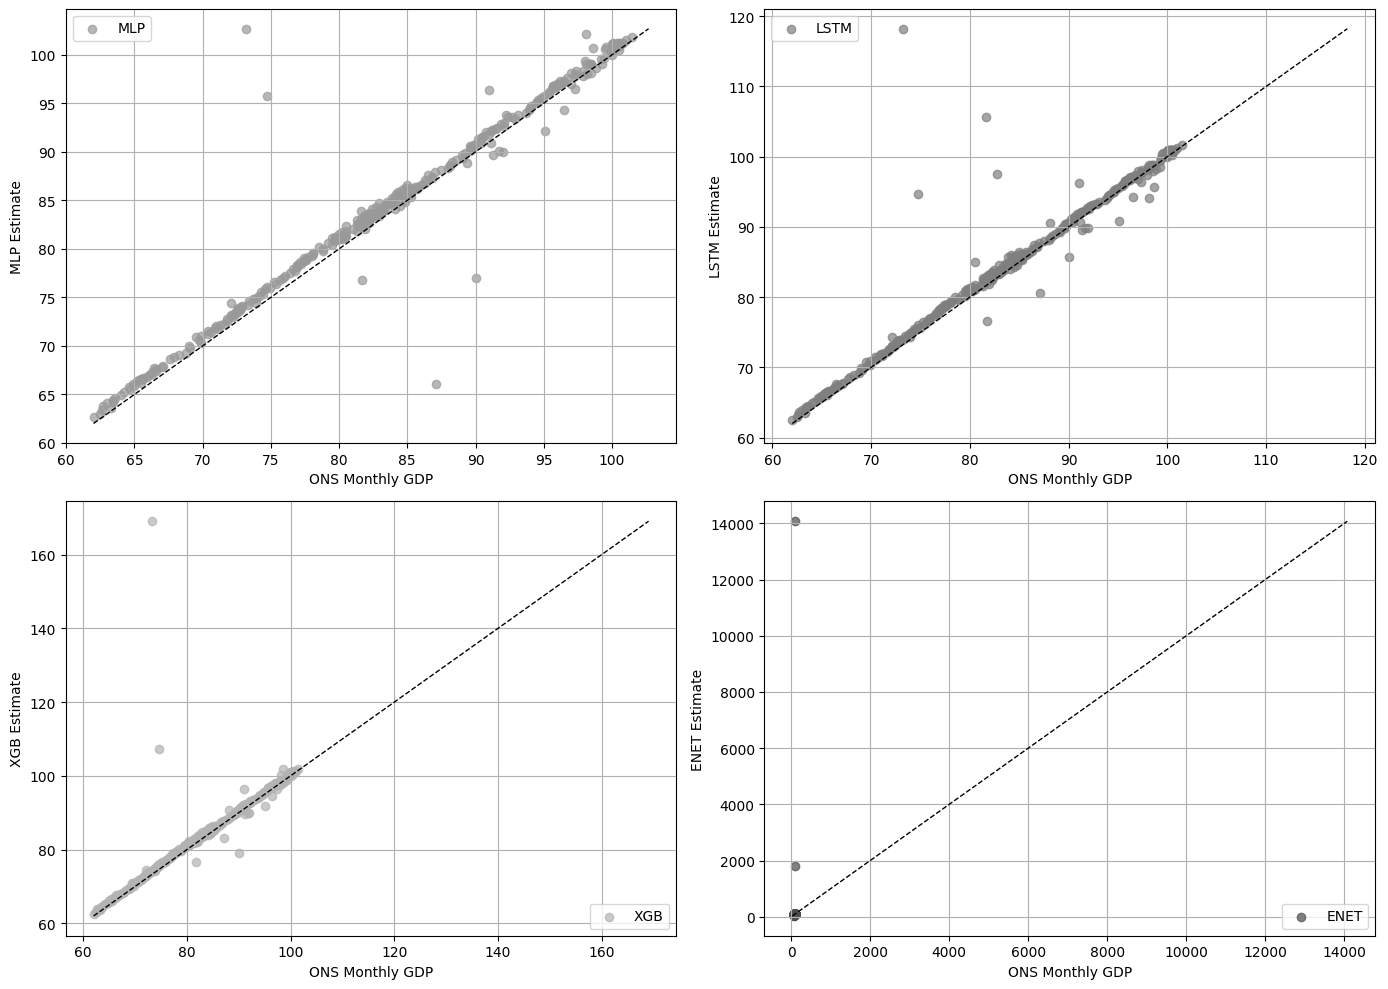

In [7]:
import matplotlib.pyplot as plt

models = ['MLP', 'LSTM', 'XGB', 'ENET']

plot_df_raw = df_filtered[['DATE', 'ONS_raw', 'con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']].copy()
plot_df_raw = plot_df_raw.rename(columns={
    "ONS_raw": "ONS Monthly GDP",
    "con_MLP": "MLP",
    "con_LSTM": "LSTM",
    "con_XGB": "XGB",
    "con_ENET": "ENET"
})

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, model in enumerate(models):
    ax = axes[idx]
    valid_df = plot_df_raw[['ONS Monthly GDP', model]].dropna()

    ax.scatter(valid_df['ONS Monthly GDP'], valid_df[model],
               label=model,
               color=model_colors.get(model, '#888888'),
               alpha=0.7)


    min_val = min(valid_df.min())
    max_val = max(valid_df.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)
    ax.set_xlabel("ONS Monthly GDP")
    ax.set_ylabel(f"{model} Estimate")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()



In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

models = ['MLP', 'LSTM', 'XGB', 'ENET']
results = []

for model in models:
    con_col = f'con_{model}'
    con_valid = df_filtered[['ONS_raw', con_col]].dropna()
    y_true_con = con_valid['ONS_raw']
    y_pred_con = con_valid[con_col]

    ann_col = f'ann_{model}'
    ann_valid = df_filtered[['ONS', ann_col]].dropna()
    y_true_ann = ann_valid['ONS']
    y_pred_ann = ann_valid[ann_col]

    mae = mean_absolute_error(y_true_con, y_pred_con)
    rmse = mean_squared_error(y_true_con, y_pred_con) ** 0.5
    corr = np.corrcoef(y_true_con, y_pred_con)[0, 1]
    sign_acc = (np.sign(y_true_ann) == np.sign(y_pred_ann)).mean()

    results.append({
        'Model': model,
        'MAE': mae,
        'RMSE': rmse,
        'Correlation': corr,
        'Sign Accuracy': sign_acc
    })

results_df = pd.DataFrame(results)
print(results_df)



  Model        MAE        RMSE  Correlation  Sign Accuracy
0   MLP   1.212757    2.663889     0.971723       0.928571
1  LSTM   1.176287    3.334704     0.954282       0.906832
2   XGB   1.323331    5.732762     0.872964       0.909938
3  ENET  49.364908  779.261949     0.056286       0.807453


/var/folders/1b/b3lsjhy10fsd753tw_292d5w0000gn/T/ipykernel_16562/3524306974.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_error_df, x='Model', y='Absolute Error', palette=model_colors)


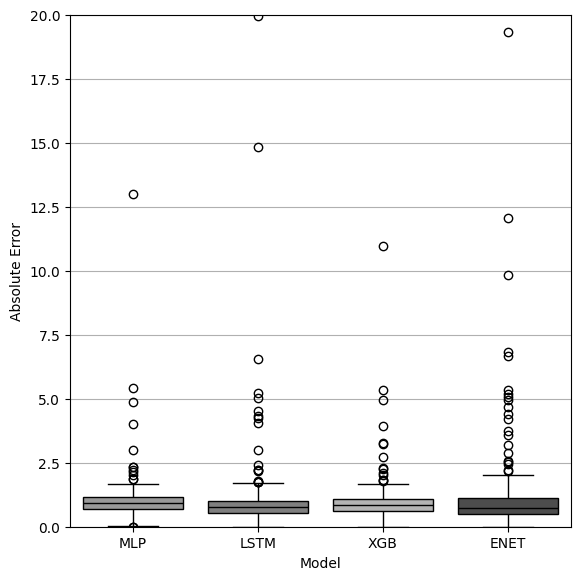

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

error_df = df_filtered[['DATE', 'ONS_raw', 'con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']].copy()

error_df = error_df.rename(columns={
    'con_MLP': 'MLP',
    'con_LSTM': 'LSTM',
    'con_XGB': 'XGB',
    'con_ENET': 'ENET'
})

models = ['MLP', 'LSTM', 'XGB', 'ENET']

for model in models:
    error_df[f'abs_error_{model}'] = abs(error_df['ONS_raw'] - error_df[model])

# melt
melted_error_df = error_df.melt(
    id_vars='DATE',
    value_vars=[f'abs_error_{m}' for m in models],
    var_name='Model',
    value_name='Absolute Error'
)
melted_error_df['Model'] = melted_error_df['Model'].str.replace('abs_error_', '')

# boxplot with 15cm x 15cm size (5.90551 inch)
plt.figure(figsize=(5.90551, 5.90551))
sns.boxplot(data=melted_error_df, x='Model', y='Absolute Error', palette=model_colors)

plt.ylim(0, 20)
plt.ylabel("Absolute Error")
plt.xlabel("Model")
plt.grid(True, axis='y')
plt.tight_layout()

# Save as 15cm x 15cm PDF
plt.savefig("UK_benchmark_3.pdf", bbox_inches='tight', dpi=300)
plt.show()
